# M.ª de los Ángeles Martín de la Cruz

## Iris

<ipython-input-23-affe1cdaff72>:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-23-affe1cdaff72>:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


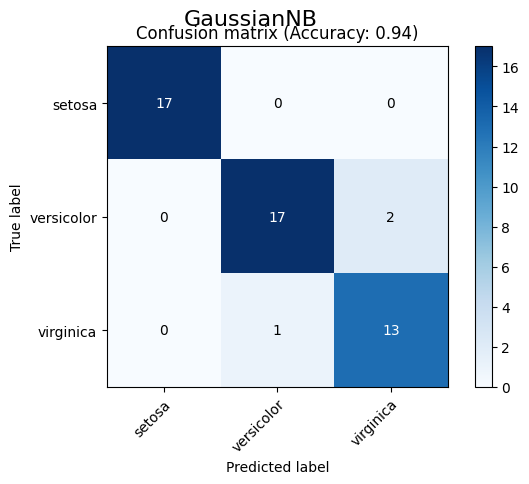

<ipython-input-23-affe1cdaff72>:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-23-affe1cdaff72>:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


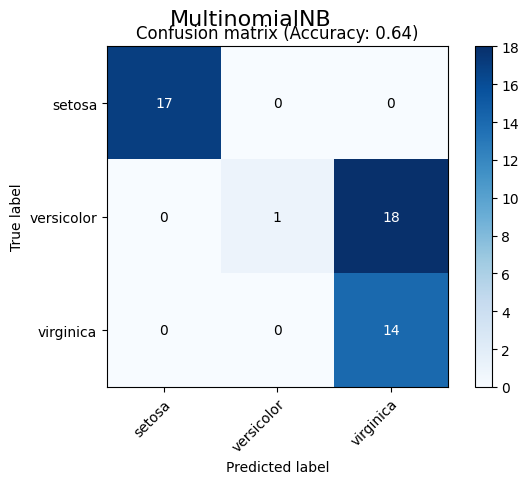

<ipython-input-23-affe1cdaff72>:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-23-affe1cdaff72>:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


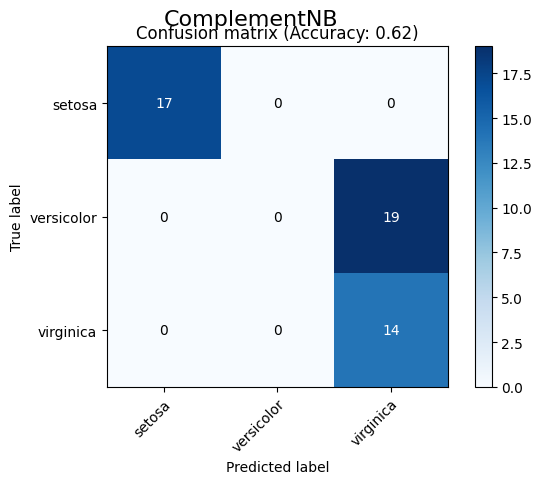

<ipython-input-23-affe1cdaff72>:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-23-affe1cdaff72>:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


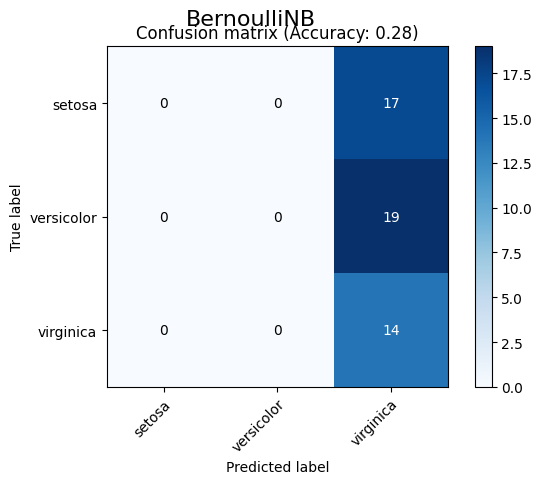

<ipython-input-23-affe1cdaff72>:63: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-23-affe1cdaff72>:64: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


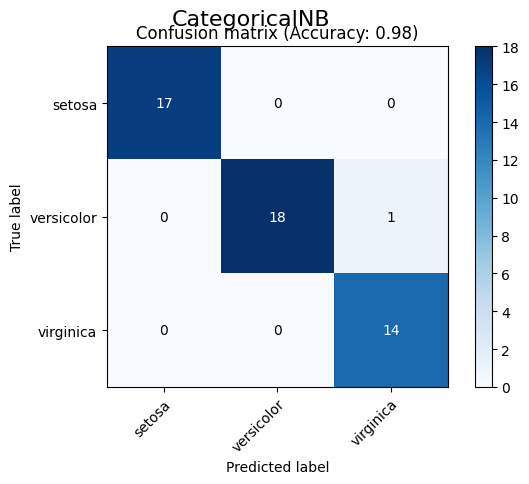

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargamos el conjunto de datos
iris = sns.load_dataset('iris')

# Separamos los datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Dividimos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

# Definimos las clases
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

# Función para la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title or 'Normalized confusion matrix'
    else:
        title = title or 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if titleSup:
        fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    plt.show()

# Función para evaluar un modelo y mostrar resultados
def evaluate_model(model, Xtrain, Xtest, ytrain, ytest, clases, titleSup):
    # Entrenamos el modelo
    model.fit(Xtrain, ytrain)

    # Realizamos predicciones
    y_pred = model.predict(Xtest)

    # Transformamos etiquetas categóricas a numéricas
    ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
    ypred_num = pd.Series(y_pred).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

    # Calculamos la precisión
    accuracy = accuracy_score(ytest_num, ypred_num)

    # Visualizamos la matriz de confusión
    plot_confusion_matrix(
        ytest_num,
        ypred_num,
        classes=clases,
        normalize=False,
        title=f'Confusion matrix (Accuracy: {accuracy:.2f})',
        titleSup=titleSup
    )

# Diccionario de modelos de Naive Bayes para
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "CategoricalNB": CategoricalNB()
}

# Evaluamos cada modelo
for name, model in models.items():
    evaluate_model(model, Xtrain, Xtest, ytrain, ytest, clases_iris, titleSup=name)


## Penguins

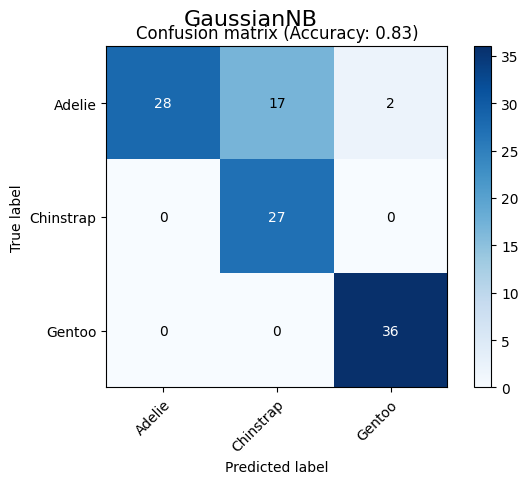

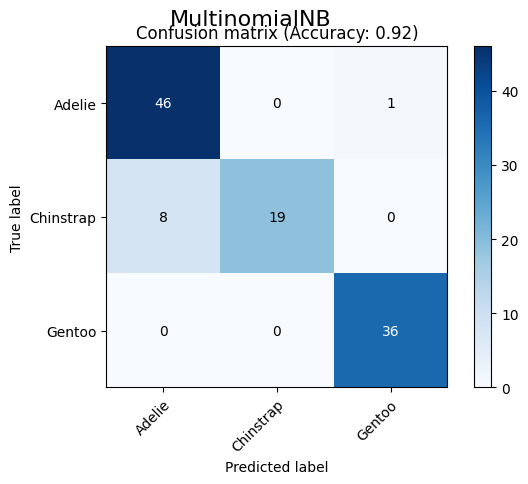

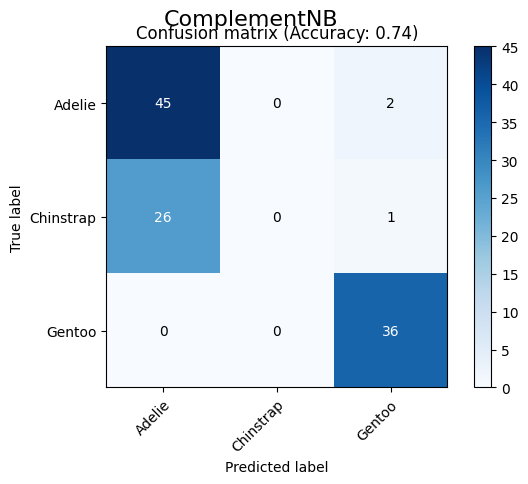

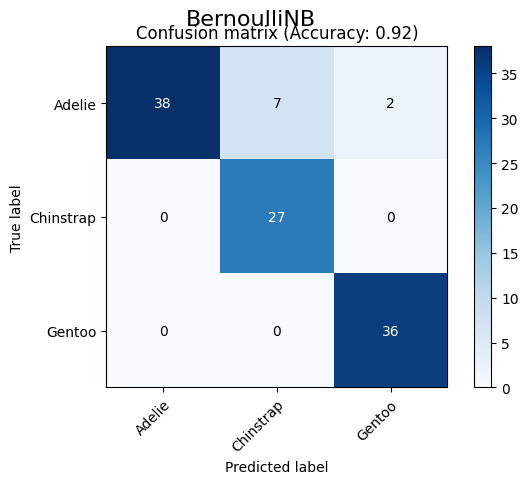

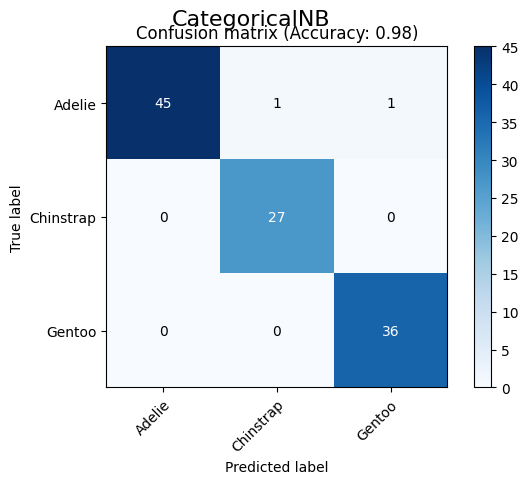

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, ComplementNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer

# Cargamos el conjunto de datos de pingüinos
penguins = sns.load_dataset('penguins')

# Eliminamos cualquier fila con valores nulos (NaN) en el dataset
penguins.dropna(inplace=True)

# Separamos las características (X) y las etiquetas (y)
# Las características son todas las columnas excepto 'species' (la etiqueta)
X_penguins = penguins.drop('species', axis=1)  # Características (columnas sin 'species')
y_penguins = penguins['species']  # Etiquetas (columna 'species')

# Verificamos si existen columnas con valores no numéricos (categóricos)
# Transformamos las columnas categóricas (como 'island' y 'sex') a valores numéricos utilizando LabelEncoder
# Esto es necesario porque el algoritmo CategoricalNB solo funciona con datos numéricos
categorical_columns = X_penguins.select_dtypes(include=['object']).columns

# Usamos LabelEncoder para convertir las columnas categóricas a variables numéricas
for col in categorical_columns:
    encoder = LabelEncoder()
    X_penguins[col] = encoder.fit_transform(X_penguins[col])

# Aplicamos KBinsDiscretizer para convertir las características continuas a categorías discretas
# Utilizamos 3 bins (grupos) para cada variable continua. Esto ayuda a que el modelo trabaje con categorías
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

# Transformamos las características continuas (que son de tipo float) en características discretizadas
X_penguins_discretized = discretizer.fit_transform(X_penguins.select_dtypes(include=[np.number]))

# Sustituimos las características originales continuas por las características discretizadas
X_penguins[X_penguins.select_dtypes(include=[np.number]).columns] = X_penguins_discretized

# Convertimos las etiquetas de texto (como 'Adelie', 'Chinstrap', 'Gentoo') en valores numéricos (por ejemplo, 0, 1, 2)
label_encoder = LabelEncoder()
y_penguins_encoded = label_encoder.fit_transform(y_penguins)

# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (train-test split)
# El 33% de los datos se usan para pruebas y el 67% para entrenamiento
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins_encoded, test_size=0.33, random_state=1)

# Definimos las clases de las etiquetas (las especies de pingüinos)
clases_penguins = np.array(['Adelie', 'Chinstrap', 'Gentoo'])

# Función para visualizar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    # Calculamos la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Si normalize=True, normalizamos la matriz de confusión
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title or 'Normalized confusion matrix'
    else:
        title = title or 'Confusion matrix, without normalization'

    # Creamos un gráfico para visualizar la matriz de confusión
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Ajustamos la orientación de las etiquetas en el eje x para que sean legibles
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Configuramos el formato de los números en la matriz
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Añadimos los valores dentro de las celdas de la matriz
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    # Ajustamos el layout y mostramos el gráfico
    fig.tight_layout()
    if titleSup:
        fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    plt.show()

# Función para entrenar y evaluar un modelo
def evaluate_model(model, Xtrain, Xtest, ytrain, ytest, clases, titleSup):
    # Entrenamos el modelo usando los datos de entrenamiento
    model.fit(Xtrain, ytrain)

    # Realizamos las predicciones usando los datos de prueba
    y_pred = model.predict(Xtest)

    # Calculamos la precisión del modelo comparando las predicciones con las etiquetas reales
    accuracy = accuracy_score(ytest, y_pred)

    # Visualizamos la matriz de confusión
    plot_confusion_matrix(
        ytest,
        y_pred,
        classes=clases,
        normalize=False,
        title=f'Confusion matrix (Accuracy: {accuracy:.2f})',
        titleSup=titleSup
    )

# Diccionario de modelos de Naive Bayes que queremos evaluar
models = {
    "GaussianNB": GaussianNB(),  # Gaussian Naive Bayes
    "MultinomialNB": MultinomialNB(),  # Multinomial Naive Bayes
    "ComplementNB": ComplementNB(),  # Complement Naive Bayes
    "BernoulliNB": BernoulliNB(),  # Bernoulli Naive Bayes
    "CategoricalNB": CategoricalNB()  # Categorical Naive Bayes
}

# Evaluamos cada modelo, entrenamos, realizamos las predicciones y mostramos la matriz de confusión
for name, model in models.items():
    evaluate_model(model, Xtrain, Xtest, ytrain, ytest, clases_penguins, titleSup=name)





## Apuntes

### Si lo calculamos uno a uno

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargamos el conjunto de datos
iris = sns.load_dataset('iris')

# Separamos los datos de entrada y salida
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Dividimos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, test_size=0.33, random_state=1)

# Definimos las clases
clases_iris = np.array(['setosa', 'versicolor', 'virginica'])

# Función para la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, titleSup=None):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = title or 'Normalized confusion matrix'
    else:
        title = title or 'Confusion matrix, without normalization'

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    if titleSup:
        fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    plt.show()


<ipython-input-12-53fd73ed8c4e>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-12-53fd73ed8c4e>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_gaussian_num = pd.Series(y_model_gaussian).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


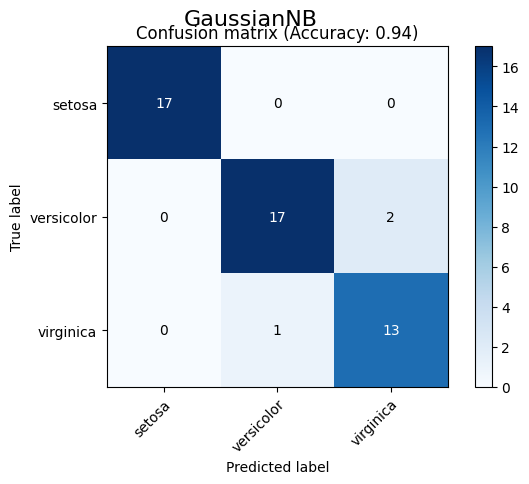

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instanciamos y entrenamos el modelo
model_gaussian = GaussianNB()
model_gaussian.fit(Xtrain, ytrain)

# Realizamos predicciones
y_model_gaussian = model_gaussian.predict(Xtest)

# Transformamos etiquetas categóricas a numéricas
ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_model_gaussian_num = pd.Series(y_model_gaussian).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Calculamos la precisión
accuracy_gaussian = accuracy_score(ytest_num, y_model_gaussian_num)

# Visualizamos la matriz de confusión
plot_confusion_matrix(
    ytest_num,
    y_model_gaussian_num,
    classes=clases_iris,
    normalize=False,
    title=f'Confusion matrix (Accuracy: {accuracy_gaussian:.2f})',
    titleSup='GaussianNB'
)

<ipython-input-16-a51765be0fca>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-16-a51765be0fca>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_multinomial_num = pd.Series(y_model_multinomial).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


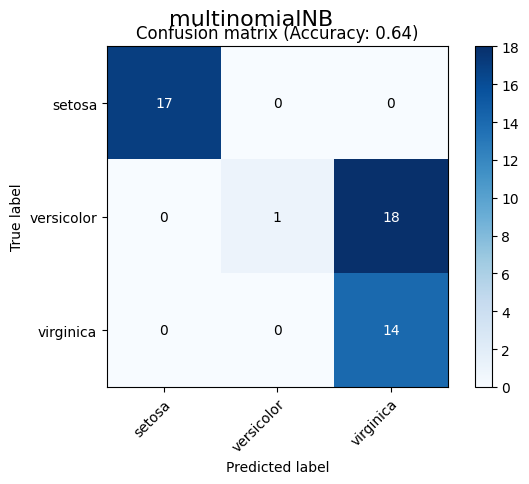

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instanciamos el modelo MultinomialNB
model_multinomial = MultinomialNB()

# Entrenamos el modelo con los datos de entrenamiento
model_multinomial.fit(Xtrain, ytrain)

# Realizamos predicciones en los datos de prueba
y_model_multinomial = model_multinomial.predict(Xtest)

# Transformamos etiquetas categóricas a numéricas
ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_model_multinomial_num = pd.Series(y_model_multinomial).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Calculamos la precisión
accuracy_multinomial = accuracy_score(ytest_num, y_model_multinomial_num)

# Visualizamos la matriz de confusión
plot_confusion_matrix(
    ytest_num,
    y_model_multinomial_num,
    classes=clases_iris,
    normalize=False,
    title=f'Confusion matrix (Accuracy: {accuracy_multinomial:.2f})',
    titleSup='MultinomialNB'
)

<ipython-input-18-26b4606324be>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-18-26b4606324be>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_complement_num = pd.Series(y_model_complement).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


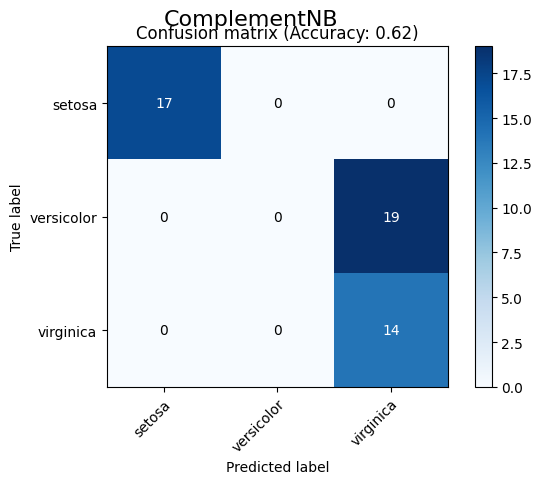

In [ ]:
from sklearn.naive_bayes import ComplementNB

# Instanciamos el modelo ComplementNB
model_complement = ComplementNB()

# Entrenamos el modelo con los datos de entrenamiento
model_complement.fit(Xtrain, ytrain)

# Realizamos predicciones en los datos de prueba
y_model_complement = model_complement.predict(Xtest)

# Transformamos etiquetas categóricas a numéricas
ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_model_complement_num = pd.Series(y_model_complement).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Calculamos la precisión
accuracy_complement = accuracy_score(ytest_num, y_model_complement_num)

# Visualizamos la matriz de confusión
plot_confusion_matrix(
    ytest_num,
    y_model_complement_num,
    classes=clases_iris,
    normalize=False,
    title=f'Confusion matrix (Accuracy: {accuracy_complement:.2f})',
    titleSup='ComplementNB'
)


<ipython-input-20-2494875eb9d8>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-20-2494875eb9d8>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_bernoulli_num = pd.Series(y_model_bernoulli).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


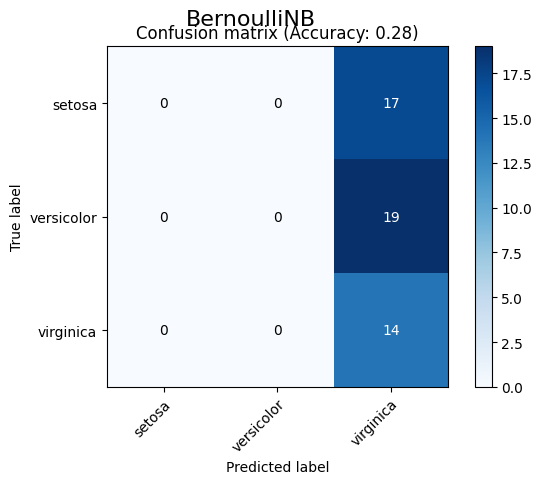

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Instanciamos el modelo BernoulliNB
model_bernoulli = BernoulliNB()

# Entrenamos el modelo con los datos de entrenamiento
model_bernoulli.fit(Xtrain, ytrain)

# Realizamos predicciones en los datos de prueba
y_model_bernoulli = model_bernoulli.predict(Xtest)

# Transformamos etiquetas categóricas a numéricas
ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_model_bernoulli_num = pd.Series(y_model_bernoulli).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Calculamos la precisión
accuracy_bernoulli = accuracy_score(ytest_num, y_model_bernoulli_num)

# Visualizamos la matriz de confusión
plot_confusion_matrix(
    ytest_num,
    y_model_bernoulli_num,
    classes=clases_iris,
    normalize=False,
    title=f'Confusion matrix (Accuracy: {accuracy_bernoulli:.2f})',
    titleSup='BernoulliNB'
)


<ipython-input-21-c9c778aaf134>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
<ipython-input-21-c9c778aaf134>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_model_categorical_num = pd.Series(y_model_categorical).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])


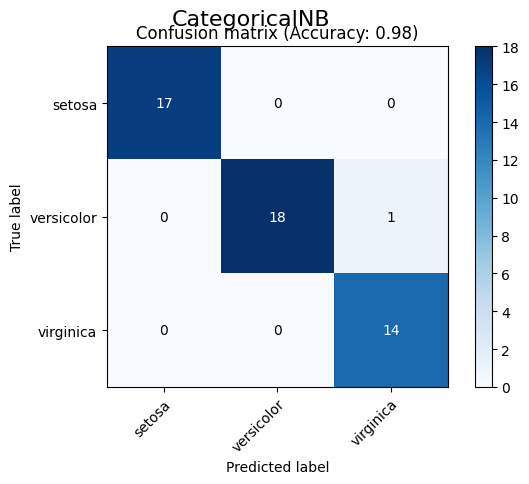

In [ ]:
from sklearn.naive_bayes import CategoricalNB

# Instanciamos el modelo CategoricalNB
model_categorical = CategoricalNB()

# Entrenamos el modelo con los datos de entrenamiento
model_categorical.fit(Xtrain, ytrain)

# Realizamos predicciones en los datos de prueba
y_model_categorical = model_categorical.predict(Xtest)

# Transformamos etiquetas categóricas a numéricas
ytest_num = ytest.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_model_categorical_num = pd.Series(y_model_categorical).replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

# Calculamos la precisión
accuracy_categorical = accuracy_score(ytest_num, y_model_categorical_num)

# Visualizamos la matriz de confusión
plot_confusion_matrix(
    ytest_num,
    y_model_categorical_num,
    classes=clases_iris,
    normalize=False,
    title=f'Confusion matrix (Accuracy: {accuracy_categorical:.2f})',
    titleSup='CategoricalNB'
)
